## Marvel Superheroes Data EDA 분석
- Dataset : https://www.kaggle.com/dannielr/marvel-superheroes?select=comics.csv

##  데이터 셋 로드 및 라이브러리 호출
- DatasetLoad
- 필요 라이브러리 import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
info_df = pd.read_csv('../input/marvel-superheroes/charcters_stats.csv')
info_df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [6]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          611 non-null    object
 1   Alignment     608 non-null    object
 2   Intelligence  611 non-null    int64 
 3   Strength      611 non-null    int64 
 4   Speed         611 non-null    int64 
 5   Durability    611 non-null    int64 
 6   Power         611 non-null    int64 
 7   Combat        611 non-null    int64 
 8   Total         611 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.1+ KB


## Core Mission

### 1. 능력치의 합이 가장 높은 캐릭터 정보

In [7]:
info_df[['Name', 'Total']].sort_values(by='Total', ascending=False)

,Name,Total
361,Martian Manhunter,581
242,General Zod,579
535,Superboy-Prime,579
537,Superman,579
16,Amazo,575
...,...,...
462,Renata Soliz,5
137,Captain Mar-vell,5
136,Captain Epic,5
466,Ripcord,5


- 각 능력치의 합이 가장 높은 캐릭터는 '	Martian Manhunter' 이다

### 2. 좋은 캐릭터와 나쁜 캐릭터 능력치들의 수치 분포

In [8]:
info_df['Alignment'].unique()

array(['good', 'bad', nan, 'neutral'], dtype=object)

좋은지 나쁜지 결측치의 캐릭터들 골라내기

In [9]:
info_df[info_df['Alignment'].isna() == True]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
28,Anti-Venom,NaN,75,60,65,90,85,84,459
98,Blackwulf,NaN,50,28,8,30,59,25,200
560,Trickster,NaN,1,1,1,1,0,1,5


결측치가 있는 행 정보 삭제
- clean_df : 결측치가 없는 clean한 데이터

In [10]:
clean_df = info_df.dropna(subset=['Alignment'],axis=0)
clean_df.shape

(608, 9)

먼저 Alignment 의 속성으로 groupby를 해서 평균을 낸다

In [11]:
alignment_df = clean_df.groupby('Alignment').mean()
alignment_df

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Alignment,,,,,,,
bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303,247.212121
good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648,214.990741
neutral,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364,355.363636


각 능력치의 정보를 Bar 그래프로 표현한다

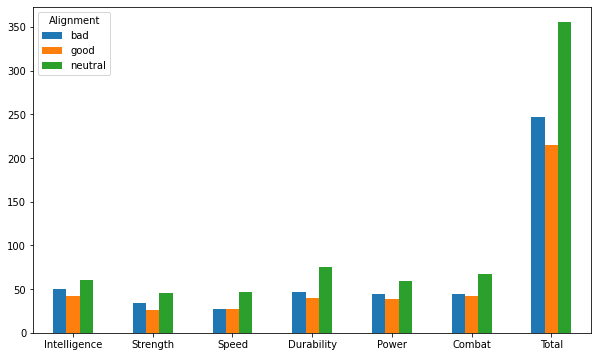

In [12]:
alignment_df.transpose().plot(figsize=(10,6),kind='bar',rot=0)
plt.show()

## Extra Mission

### 마블 캐릭터와 DC 캐릭터 정보 비교하기

In [14]:
df = pd.read_csv('../input/marvel-superheroes/marvel_characters_info.csv')
df.head()

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0


여러 존재하는 Publisher중에서 마블과 DC의 정보만 빼오기
- 추출할 col 정보 : Name, Publisher 

In [16]:
df['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [44]:
dc_mv_df = df[df['Publisher'].isin(['DC Comics','Marvel Comics'])][['Name','Publisher']]
dc_mv_df.head()

,Name,Publisher
0,A-Bomb,Marvel Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Abraxas,Marvel Comics
5,Absorbing Man,Marvel Comics


Marvel, DC 캐릭터의 stat 능력치 table 만들기
- characters_stats 데이터인 info_df 와 추출한 dc_df을 Name 기준으로 inner join

In [32]:
info_df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [64]:
publisher_df = pd.merge(info_df, dc_mv_df, on='Name')
publisher_df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
0,A-Bomb,good,38,100,17,80,17,64,316,Marvel Comics
1,Abin Sur,good,50,90,53,64,84,65,406,DC Comics
2,Abomination,bad,63,80,53,90,55,95,436,Marvel Comics
3,Abraxas,bad,88,100,83,99,100,56,526,Marvel Comics
4,Adam Strange,good,1,1,1,1,0,1,5,DC Comics


합쳐진 Dataframe으로 Marvel과 Dc의 캐릭터 능력치의 합을 시각화

In [65]:
publisher_df.groupby('Publisher').mean()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Publisher,,,,,,,
DC Comics,50.738372,32.418605,31.610465,45.691860,46.540698,46.436047,253.436047
Marvel Comics,47.014327,32.303725,29.246418,45.951289,42.550143,46.785100,243.851003


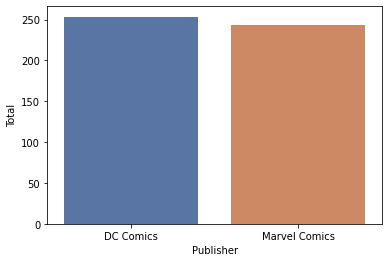

In [75]:
total_df = publisher_df.groupby(['Publisher'])['Total'].mean().reset_index()
sns.barplot(x='Publisher', y='Total', palette="deep", data=test_df)
plt.show()

#### 결론 : DC comics의 능력치 합의 평균이 Marvel Comics 보다 근소하게 더 높다.

### 좋은 캐릭터와 나쁜 캐릭터가 격돌하는 경우, 어떤 캐릭터 진영이 승리할까??


우선, 각 좋은 캐릭터와 나쁜 캐릭터의 진영에 대한 능력치합의 평균을 도출한다.

In [80]:
# clean_df는 결측치를 제거한 clean한 DataFrame
clean_df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [81]:
clean_df.groupby('Alignment')['Total'].mean()

Alignment
bad        247.212121
good       214.990741
neutral    355.363636
Name: Total, dtype: float64

위 결과를 보면 좋은 캐릭터의 종합 능력치가 나쁜 캐릭터의 캐릭터 종합 능력치보다 더 열세이다.

중립캐릭터가 좋은 캐릭터 팀에 가담한 후 진영비교

In [96]:
clean_df.loc[(clean_df['Alignment'] == 'neutral'),'Alignment'] = 'good'
clean_df['Alignment'].unique()

array(['good', 'bad'], dtype=object)

In [97]:
clean_df.groupby('Alignment')['Total'].mean()

Alignment
bad     247.212121
good    218.476298
Name: Total, dtype: float64

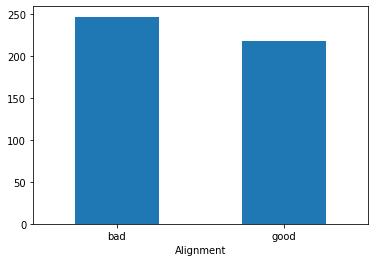

In [103]:
clean_df.groupby('Alignment')['Total'].mean().plot(kind='bar',rot=0)
plt.show()

#### 결론 : 중립 진영의 캐릭터가 열세인 좋은 캐릭터에 가담해도, 나쁜 캐릭터의 능력치가 우세하다.